In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(12345)

%matplotlib inline

In [2]:
# load data
FILE1="/home/weiss/thermal_project/thermal_raw_20210507_full/20210507_1605_3078.txt"
FILE2="/home/weiss/thermal_project/thermal_raw_20210507_full/20210507_1605_C088.txt"
# these files are too big
# therefore, we use the first 50 entries of FILE1 via 
# head -n 50 20210507_1605_3078.txt > first_eval.txt 
#FILE="/home/weiss/thermal_project/thermal_raw_20210507_full/first_eval.txt"
FILE="/home/weiss/thermal_project/thermal_raw_20210507_full/eval_1635783053.txt"
data = list()

with open(FILE, "r") as f:
    for line in f:
        record = json.loads(line)
        data.append(record)

df = pd.DataFrame(data)

# fix datatypes, drop sensor_size
df['Timestamp'] = df['Timestamp'].astype('int32')
df['Sensor ID'] = df['Sensor ID'].str.replace(r'Sensor_32x32_', r'')
df['Room Temperature'] = df['Room Temperature'].astype('float32')
df = df.drop(['Sensor size'], axis=1)

# show datatypes
print(df.dtypes)

# show first 3 rows
df.head(n=3)

Timestamp             int32
Sensor ID            object
Room Temperature    float32
RSSI                  int64
data                 object
dtype: object


,Timestamp,Sensor ID,Room Temperature,RSSI,data
0,1620393035,3078,22.400000,-72,"[[11.2, 11.6, 11.3, 11.4, 11.6, 10.8, 11.5, 11..."
1,1620393021,C088,22.400000,-60,"[[10.6, 13.5, 13.0, 12.6, 12.4, 13.3, 13.1, 12..."
2,1620392991,3078,22.299999,-68,"[[11.5, 10.9, 11.0, 10.9, 10.5, 11.6, 11.9, 12..."


In [3]:
# select one sample by index
df.iloc[1]

Timestamp                                                  1620393021
Sensor ID                                                        C088
Room Temperature                                                 22.4
RSSI                                                              -60
data                [[10.6, 13.5, 13.0, 12.6, 12.4, 13.3, 13.1, 12...
Name: 1, dtype: object

In [4]:
# show the sample count
df.shape[0]

100

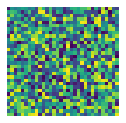

In [54]:
# random image
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
plt.imshow(np.random.rand(32, 32), interpolation='nearest', aspect='auto')
plt.savefig('random.png')

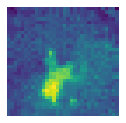

In [51]:
# human
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
plt.imshow(df.iloc[66].data, interpolation='nearest', aspect='auto')
plt.savefig('human.png')

In [ ]:
# human
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
plt.imshow(df.iloc[66].data, interpolation='nearest', aspect='auto')

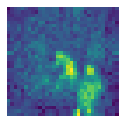

In [50]:
# non-human
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
plt.imshow(df.iloc[49].data, interpolation='nearest', aspect='auto')
plt.savefig('two-humans.png')

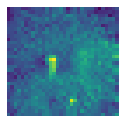

In [52]:
# non-human
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
plt.imshow(df.iloc[20].data, interpolation='nearest', aspect='auto')
plt.savefig('non-human.png')

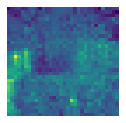

In [48]:
# no heat source at all
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_axis_off()
plt.imshow(df.iloc[52].data, interpolation='nearest', aspect='auto')
plt.savefig('no-heat.png')

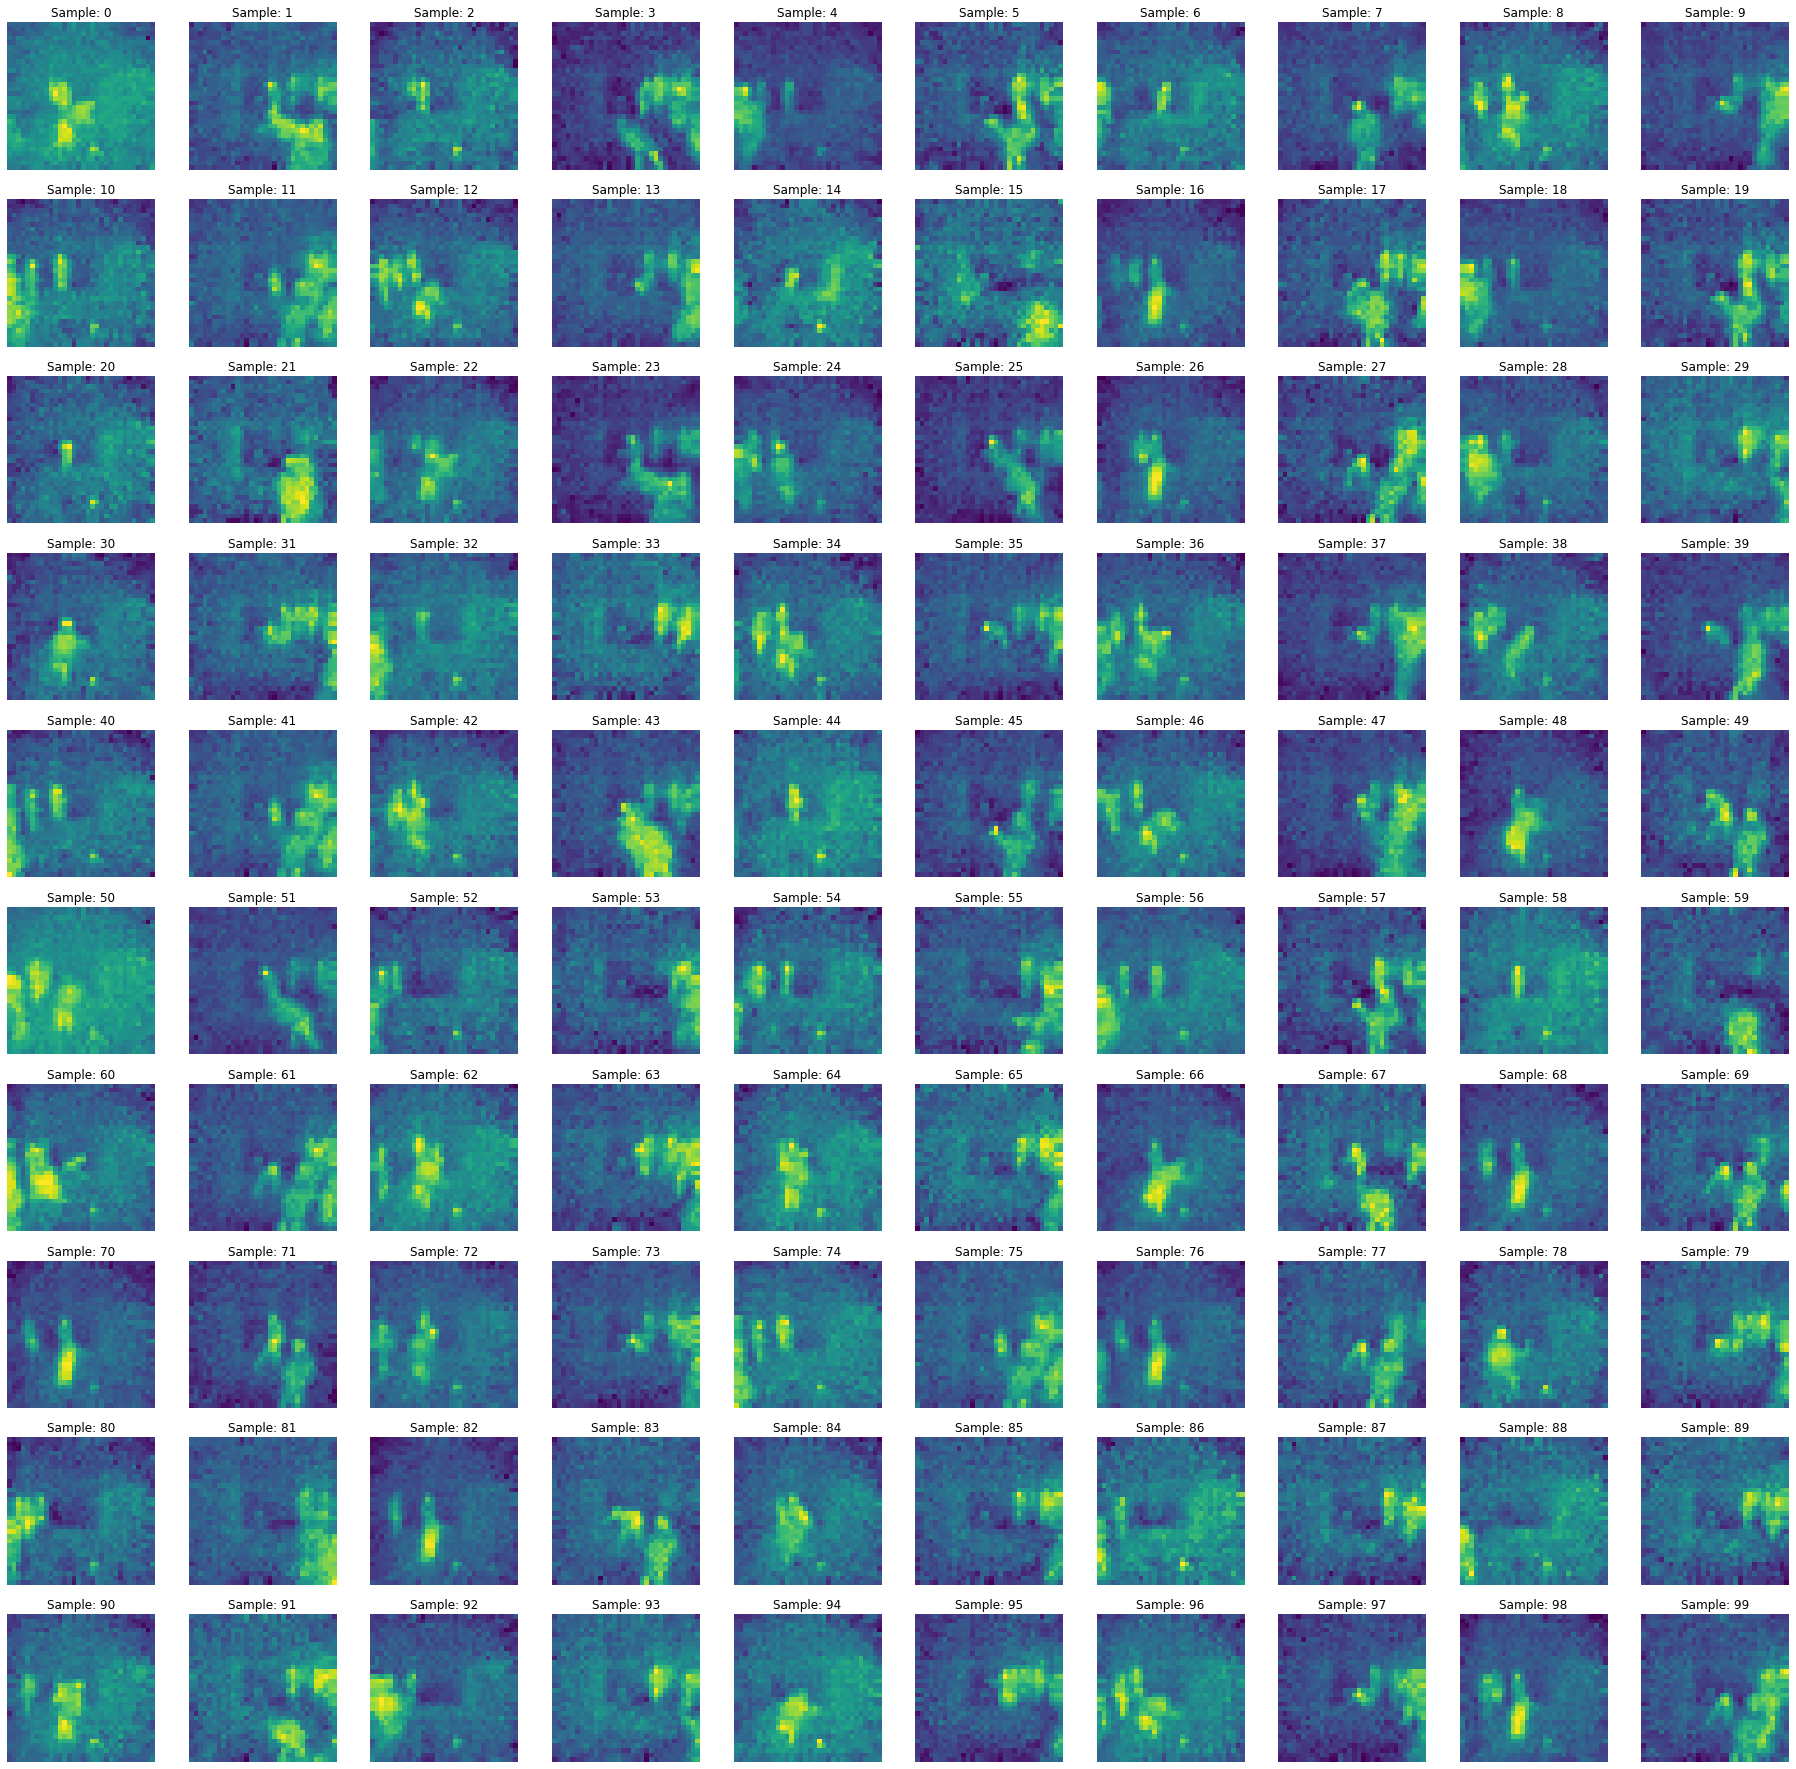

In [25]:
#  A few random samples

# # Simple version
# use_samples = [0, 5, 49]
# # Generate plots for samples
# for sample in use_samples:
#   #reshaped_image = input_train[sample].reshape((img_width, img_height))
#   plt.imshow(df.iloc[sample].data)
#   plt.show()

%matplotlib inline

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(32, 32))
i = 0
for axs in axes:
    for ax in axs:
        ax.set_axis_off()
        ax.imshow(df.iloc[i].data)
        ax.set_title('Sample: %i' % i)
        i += 1